In [14]:
import matplotlib.pyplot as plt  # For graphics
%matplotlib inline

from openfisca_core.model_api import *
from openfisca_tunisia.tunisia_taxbenefitsystem import TunisiaTaxBenefitSystem

In [15]:
tax_benefit_system = TunisiaTaxBenefitSystem()

In [16]:
year = 2017
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = year,
    axes = [
        [
            dict(
                count = 100,
                name = 'salaire_de_base',
                min = 0,
                max = 60000,
                period = 2014,
                ),
            dict(
                count = 100,
                name = 'salaire_de_base',
                min = 0,
                max = 60000,
                period = 2015,
                ),
            dict(
                count = 100,
                name = 'salaire_de_base',
                min = 0,
                max = 60000,
                period = 2016,
                ),
            dict(
                count = 100,
                name = 'salaire_de_base',
                min = 0,
                max = 60000,
                period = 2017,
                ),
            ]
        ],
    parent1 = dict(age = 40, salaire_de_base = 10000),
    ).new_simulation()

In [28]:
salaire_imposable_by_year = dict(
    (year, simulation.calculate_add('salaire_imposable', period = year)) 
    for year in range(2014, 2019)
    )
irpp_by_year = dict(
    (year, simulation.calculate('irpp', period = year)) 
    for year in range(2014, 2019)
    )

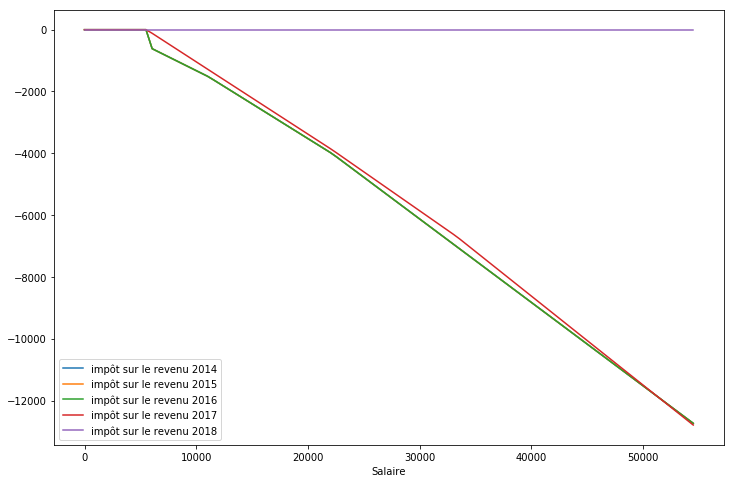

In [29]:
plt.figure(figsize=(12, 8))
salaire_imposable = salaire_imposable_by_year[2014]
for year in range(2014, 2019):
    plt.plot(salaire_imposable, irpp_by_year[year], label=u'impôt sur le revenu {}'.format(year))
    plt.xlabel(u'Salaire')
    plt.legend()


In [31]:
simulation.calculate('irpp', period = 2014)

array([    -0.        ,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,     -0.        ,     -0.        ,   -614.84014893,
         -713.91638184,   -812.99279785,   -912.06903076,  -1011.14532471,
        -1110.22180176,  -1209.2980957 ,  -1308.37463379,  -1407.45056152,
        -1506.52734375,  -1625.75415039,  -1749.6003418 ,  -1873.44482422,
        -1997.29101562,  -2121.13623047,  -2244.98193359,  -2368.82763672,
        -2492.67260742,  -2616.51757812,  -2740.36328125,  -2864.2097168 ,
        -2988.05444336,  -3111.89990234,  -3235.74511719,  -3359.59082031,
        -3483.43652344,  -3607.28125   ,  -3731.12646484,  -3854.97265625,
        -3978.81835938,  -4118.1953125 ,  -4266.81005859,  -4415.42480469,
        -4564.04101562,  -4712.65283203,  -4861.26757812,  -5009.8828125 ,
        -5158.49853516,  -5307.11279297,  -5455.72705078,  -5604.34130859,
        -5752.95654297,  

In [24]:
simulation.calculate('revenu_disponible', period = year)

array([ 8256.8125], dtype=float32)